SANJYOT GAMBARE

Data Science and business analyst at TheSparksFoundation

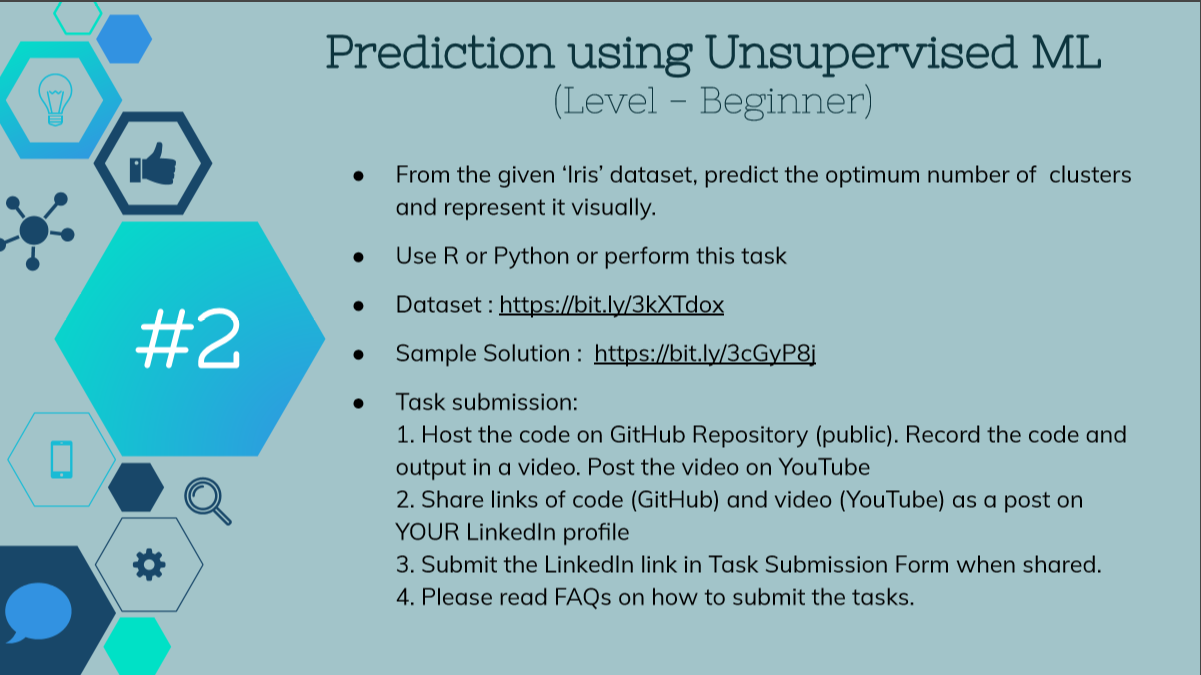

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [3]:
#load in the data
data = load_iris()
#convert to a dataframe
df = pd.DataFrame(data.data, columns = data.feature_names)
#create the species column
df['Species'] = data.target

In [4]:
#replace this with the actual names
target = np.unique(data.target)
target_names = np.unique(data.target_names)
targets = dict(zip(target, target_names))
df['Species'] = df['Species'].replace(targets)

In [5]:
#extract features and target variables
x = df.drop(columns="Species")
y = df["Species"]

In [6]:
#save the feature name and target variables
feature_names = x.columns
labels = y.unique()

In [7]:
#split the dataset
from sklearn.model_selection import train_test_split
X_train, test_x, y_train, test_lab = train_test_split(x,y,test_size = 0.4,random_state = 42)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
clf = DecisionTreeClassifier(max_depth =3, random_state = 42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [12]:
test_pred_decision_tree = clf.predict(test_x)

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree

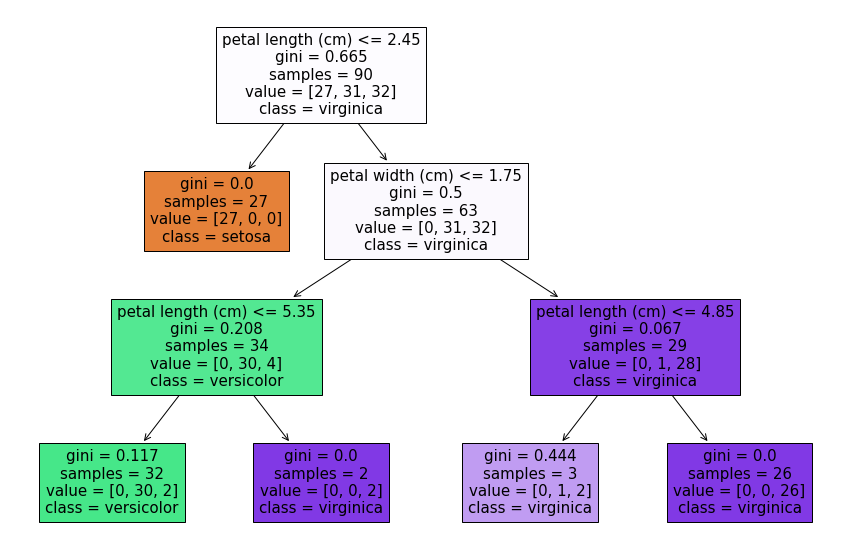

In [14]:
fig = plt.figure(figsize=(15, 10))
_ = tree.plot_tree(clf, 
                   feature_names=feature_names,  
                   class_names=target_names,
                   filled=True)

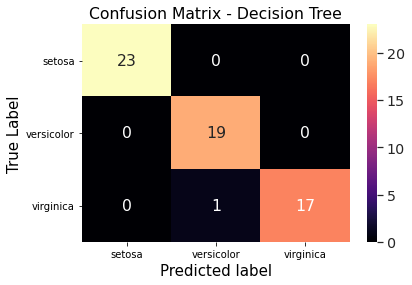

<Figure size 720x504 with 0 Axes>

In [15]:
#import the relevant packages
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_lab,  
                                            test_pred_decision_tree)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['']+labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()


In [16]:
metrics.accuracy_score(test_lab, test_pred_decision_tree)

0.9833333333333333

In [18]:
temp = [[4.6, 3.4, 1.4, 0.3]]
print(clf.predict(temp))

['setosa']
